In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
restaurent = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\MRS\Zomato_Restaurant_Recommendation\Dataset\HyderabadResturants.csv')

In [4]:
restaurent.head()

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [5]:
restaurent.shape

(657, 5)

In [6]:
restaurent['price for one'].value_counts()

price for one
100    237
150    156
350     72
50      60
300     48
250     48
200     24
400     12
Name: count, dtype: int64

In [7]:
restaurent['names'].value_counts()

names
Kwality Wall’s Frozen Dessert and Ice Cream Shop    3
Sri Balaji Mithai Bhandar                           3
LunchBox - Meals and Thalis                         3
Mahalaxmi Tiffin Centre                             2
Cakes King                                          2
                                                   ..
Ghrelin Cafe & Patisserie                           1
The Exotic Shawarma                                 1
Dessi Cuppa                                         1
K&C Bakers & Confectioners                          1
Tasim                                               1
Name: count, Length: 636, dtype: int64

In [8]:
restaurent = restaurent.drop_duplicates('names')

<Axes: xlabel='count', ylabel='price for one'>

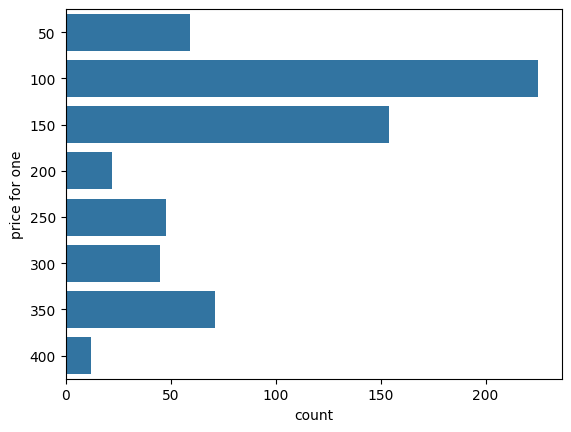

In [9]:
sns.countplot(y='price for one', data=restaurent)

From the graph we can say that most of the restaurents will cost minimum 100 for a single person

<Axes: xlabel='count', ylabel='ratings'>

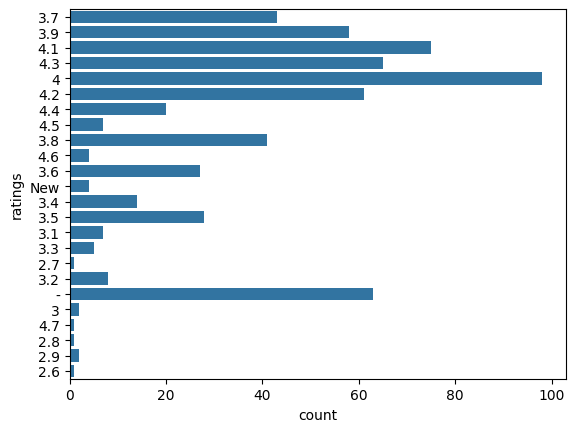

In [10]:
sns.countplot(y='ratings', data=restaurent)

In [11]:
restaurent['ratings'].replace('-', 0, inplace=True)

In [12]:
restaurent['ratings'].isna().sum()

0

<Axes: xlabel='count', ylabel='ratings'>

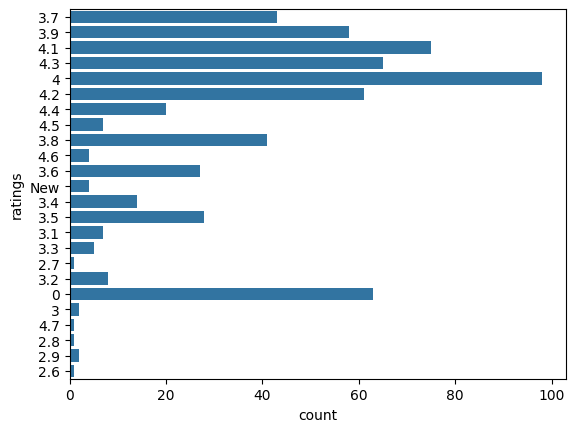

In [13]:
sns.countplot(y='ratings', data=restaurent)

Most of the ratings are in between 4.2 and 3.7

In [14]:
restaurent['ratings'] = pd.to_numeric(restaurent['ratings'], errors='coerce')
restaurent.dropna(subset=['ratings'], inplace=True)

In [15]:
top_50_by_ratings = restaurent.sort_values(by='ratings', ascending=False).head(50)

In [16]:
top_50_by_ratings.reset_index(drop=True, inplace=True)

In [21]:
top_50_by_ratings

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sri-krishna-s...,Sri Krishna Sweets,4.7,Mithai,100
1,https://www.zomato.com/hyderabad/euphoria-banj...,Euphoria,4.6,"Desserts, Bakery",350
2,https://www.zomato.com/hyderabad/almond-house-...,Almond House,4.6,"Mithai, Street Food",350
3,https://www.zomato.com/hyderabad/us-live-pops-...,US Live Pops,4.6,Fast Food,150
4,https://www.zomato.com/hyderabad/mimees-chocol...,Mimee's Chocolates,4.6,Desserts,150
5,https://www.zomato.com/hyderabad/nic-natural-i...,NIC - Natural Ice Creams,4.5,"Ice Cream, Desserts",150
6,https://www.zomato.com/hyderabad/arun-ice-crea...,Arun Ice Creams,4.5,"Ice Cream, Desserts",50
7,https://www.zomato.com/hyderabad/emerald-mitha...,Emerald Mithai Shop,4.5,Mithai,50
8,https://www.zomato.com/hyderabad/sri-shagun-mi...,Sri Shagun Mithai Vatika,4.5,Mithai,150
9,https://www.zomato.com/hyderabad/hameedi-confe...,Hameedi Confectioner,4.5,"Mithai, Desserts",200


In [19]:
pickle.dump(top_50_by_ratings, open('Top_50_Restaurents.pkl', 'wb'))